In [12]:
#Get # days on average by insepctor it takes from the start of a case to the end
#Import libraries
import pyodbc
import pandas as pd
import seaborn as sns

In [3]:
#Make connection to database
#Username and password starred out for privacy
conn = pyodbc.connect('DRIVER={ODBC Driver 13 for SQL Server};SERVER=ugaz-nrcsql;DATABASE=******;UID=*****;PWD=******')

In [5]:
#Select from Accela Code Enforcement Cases starting in 2017
query = '''SELECT * from V_RECORD WHERE RECORD_MODULE = 'Enforce' AND RECORD_OPEN_DATE >= '2021-01-01';'''
# create pandas dataframe from table data
df = pd.read_sql(query, conn)

C:\Users\nrebovich\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [6]:
for i in range(len(df['RECORD_STATUS'])):
    if (df['RECORD_STATUS'][i] == 'Completed') |  (df['RECORD_STATUS'][i] == 'Closed'):
        df.loc[i, ('Turnaround_Time')] = df['RECORD_STATUS_DATE'][i] - df['RECORD_OPEN_DATE'][i]
    else:
        df.loc[i, ('Turnaround_Time')] = 'nan'

In [7]:
closed_completed_cases = pd.notna(df['Turnaround_Time'])

In [8]:
import numpy as np

df['Turnaround_Open_Num'] = (df[closed_completed_cases]['Turnaround_Time'] / np.timedelta64(1, 'D')).astype(int)

In [9]:
filter_1 = df[df['RECORD_TYPE'] == 'Enforcement Complaint']

In [18]:
x = filter_1.groupby(['ASSIGNED_USERID']).agg(['count','mean'])['Turnaround_Open_Num']
x = x.sort_values('mean', ascending = False)
x

C:\Users\nrebovich\AppData\Local\Temp\ipykernel_22664\2644710212.py:1: FutureWarning: ['AGENCY_ID', 'RECORD_ID', 'RECORD_MODULE', 'RECORD_NAME', 'RECORD_STATUS', 'RECORD_TYPE', 'UPDATED_BY', 'ACA_INITIATED', 'ADDR_FULL_LINE#', 'ADDR_FULL_LINE1#', 'CLOSED_USERID', 'DESCRIPTION', 'INSPECTOR_USERID', 'OPENED_USERID', 'RECORD_TYPE_4LEVEL#', 'RECORD_TYPE_CATEGORY', 'RECORD_TYPE_GROUP', 'RECORD_TYPE_SUBTYPE', 'RECORD_TYPE_TYPE', 'REPORTED_CHANNEL', 'STATUS', 'TEMPLATE_ID', 'T_ID1', 'T_ID3'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  x = filter_1.groupby(['ASSIGNED_USERID']).agg(['count','mean'])['Turnaround_Open_Num']


,count,mean
ASSIGNED_USERID,,
FADEL POZO,50,65.240000
RMORGAN,98,52.030612
OWASHINGTON,97,42.804124
JOVERTON,20,40.450000
MCASTRO,115,36.695652
TTERRAZA,11,34.636364
MLSMITH,226,34.340708
LFERGUSO,30,25.966667
CMARTEL,6,20.833333


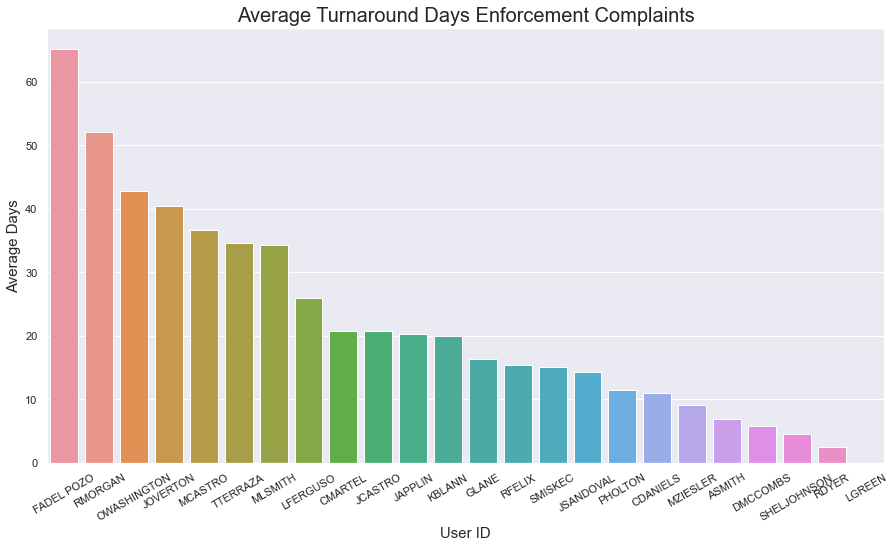

In [22]:
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(15,8)})
p = sns.barplot(x=x.index, y='mean', data=x)
plt.xticks(rotation=30)
plt.title('Average Turnaround Days Enforcement Complaints', fontsize = 20)
p.set_xlabel('User ID', fontsize = 15)
p.set_ylabel('Average Days', fontsize = 15)
plt.show()

In [67]:
filter_1.to_csv(r'C:\Users\nrebovich\Desktop\AAA.csv',index=False)